In [55]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecedent/Consequent objects hold universe variables and membership functions

#inputs
room_temp = ctrl.Antecedent(np.arange(0, 60, 1), 'room temp') #input room temperature in degree celcius
humidity = ctrl.Antecedent(np.arange(20, 80, 1), 'humidity') #input relative humidity in % = the ratio of water vapor currently in the air 
                                                                  #to the maximum water vapor at that temperature, multiplied by 100
hair_moisture = ctrl.Antecedent(np.arange(0, 100, 1), 'hair moisture') #between 0 to 100% max ppossible                                                            


#outputs
fan_speed = ctrl.Consequent(np.arange(4000, 6000, 1), 'output fan speed') #output fan speed in rpm
op_watt = ctrl.Consequent(np.arange(1500, 2000, 1), 'output_power') #output temperature controlling power in watts

#traingular membership function start, peak, end
room_temp['low'] = fuzz.trimf(room_temp.universe, [0,0,40]) #more membership o lower temperature to be in safer side providing higher fan speed and temp usually
room_temp['moderate'] = fuzz.trimf(room_temp.universe, [0, 20, 60]) 
room_temp['high'] = fuzz.trimf(room_temp.universe, [40, 60, 60]) 

humidity.automf(5, names = ['very low','low', 'moderate','humid', 'very humid'])

hair_moisture.automf(5, names = ['almost dry','less wet', 'moderately wet','wet', 'very wet'])

fan_speed.automf(5, names= ['very slow','slow', 'average','fast', 'very fast'])

#fuzz.gaussmf?
op_watt['normal'] = fuzz.trimf(op_watt.universe, [1500,1500,1600]) #traingular membership function start, peak, end
op_watt['hot'] = fuzz.trimf(op_watt.universe, [1500, 1800, 2000])
op_watt['very hot'] = fuzz.trimf(op_watt.universe, [1600, 2000, 2000])

C:\Users\Sarthak\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


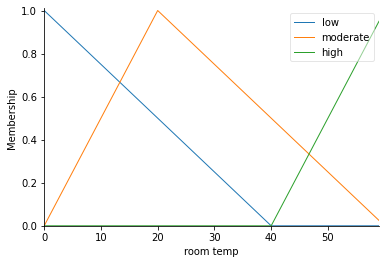

In [31]:
room_temp.view()

C:\Users\Sarthak\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


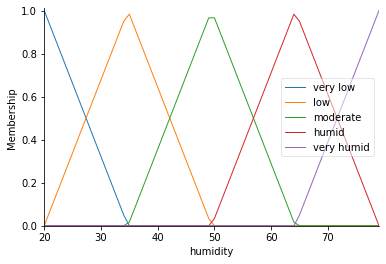

In [32]:
humidity.view()

C:\Users\Sarthak\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


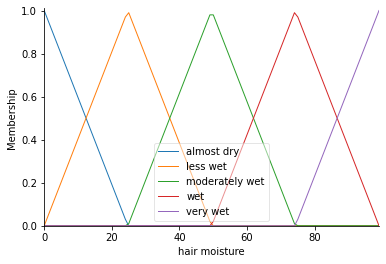

In [33]:
hair_moisture.view()

C:\Users\Sarthak\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


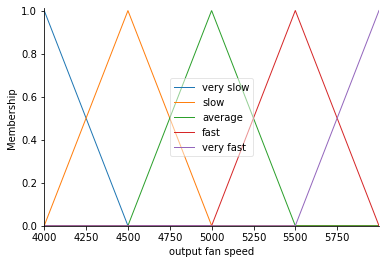

In [34]:
fan_speed.view()

C:\Users\Sarthak\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


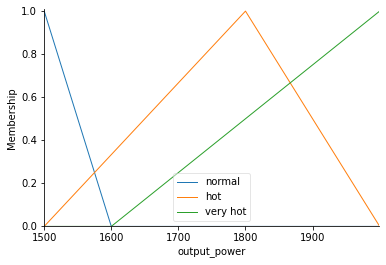

In [50]:
op_watt.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

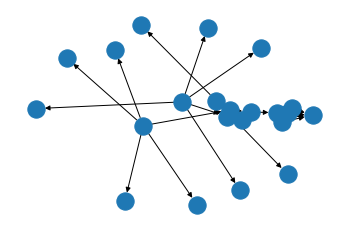

In [56]:
#RULE BASE

rule1 = ctrl.Rule(room_temp['low'] , fan_speed['very fast'])
rule2 = ctrl.Rule(room_temp['moderate'] , fan_speed['fast'])
rule3 = ctrl.Rule(humidity['very low'], fan_speed['very slow'])
rule4 = ctrl.Rule(humidity['very humid'],fan_speed['very fast'])
rule5 = ctrl.Rule( humidity['moderate'],fan_speed['fast'])

rule6 = ctrl.Rule(room_temp['low'] , op_watt['very hot'])
rule7 = ctrl.Rule(room_temp['moderate'] , op_watt['hot'])
rule8 = ctrl.Rule(humidity['very low'], op_watt['normal'])
rule9 = ctrl.Rule(humidity['very humid'],op_watt['very hot'])
rule10 = ctrl.Rule( humidity['moderate'],op_watt['hot'])

rule11 = ctrl.Rule( hair_moisture['very wet'],op_watt['very hot'])
rule12 = ctrl.Rule( hair_moisture['wet'],op_watt['very hot'])
rule13 = ctrl.Rule( hair_moisture['moderately wet'],op_watt['hot'])
rule14 = ctrl.Rule( hair_moisture['less wet'],op_watt['hot'])
rule15 = ctrl.Rule( hair_moisture['almost dry'],op_watt['normal'])

rule16 = ctrl.Rule( hair_moisture['very wet'],fan_speed['very fast'])
rule17 = ctrl.Rule( hair_moisture['wet'],fan_speed['fast'])
rule18 = ctrl.Rule( hair_moisture['moderately wet'],fan_speed['average'])
rule19 = ctrl.Rule( hair_moisture['less wet'],fan_speed['slow'])
rule20 = ctrl.Rule( hair_moisture['almost dry'],fan_speed['very slow'])

rule21 = ctrl.Rule( room_temp['high'],fan_speed['slow'])
rule22 = ctrl.Rule( room_temp['high'],op_watt['normal'])



rule1_1.view()



In [57]:
fuzzy_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5,rule6,rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,rule20, rule21, rule22 ])

In [58]:
Hair_dryer = ctrl.ControlSystemSimulation(fuzzy_control)

enter input room temperature between 0 to 60: 35
enter input relative humidity between 20 to 80: 50
enter hair moisture between 0 to 100 %: 60
output fan speed=  5281.327897089174 rpm
output power=  1780.0700561175188 watt


C:\Users\Sarthak\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Sarthak\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


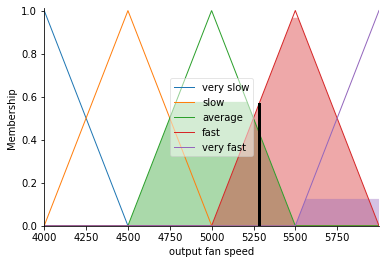

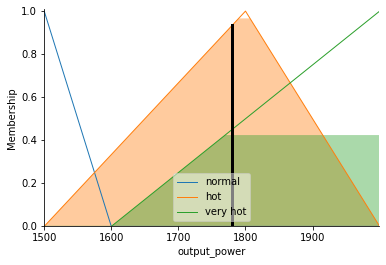

In [61]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
temp =input("enter input room temperature between 0 to 60: ") 

Hair_dryer.input['room temp'] = int(temp)

humidity = input("enter input relative humidity between 20 to 80: ")

Hair_dryer.input['humidity'] = int(humidity)

hair_moist = int(input("enter hair moisture between 0 to 100 %: "))

Hair_dryer.input['hair moisture'] = hair_moist

# Crunch the numbers
Hair_dryer.compute()

print("output fan speed= ",Hair_dryer.output['output fan speed'], "rpm")
print("output power= ", Hair_dryer.output['output_power'], "watt")

fan_speed.view(Hair_dryer)
op_watt.view(Hair_dryer)